# **CASE: *CREDIT SCORE***

---

### Instalação de bibliotecas

In [ ]:
# Para cálculo do VIF
install.packages("rms")
# Para cálculo do KS e AUC
install.packages("ROCR")

### Carregamento de bibliotecas

In [1]:
library(rms)
library(ROCR)

Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




### Leitura da base de dados

In [2]:
dados_credito <- read.table(file = "../Dados/Credit_Score.txt",
                            sep = "\t",
                            dec = ".",
                            header = TRUE)

### Visualização da base de dados

In [ ]:
View(dados_credito)

### Análise exploratória breve

In [3]:
# Medidas resumo
summary(dados_credito)

       ID            SAFRA               IDADE       RENDA_MEDIA_MENSAL
 Min.   :  5634   Length:18258       Min.   :18.00   Min.   : 1100     
 1st Qu.: 29023   Class :character   1st Qu.:27.00   1st Qu.: 4800     
 Median : 77388   Mode  :character   Median :33.00   Median : 7700     
 Mean   : 75197                      Mean   :34.99   Mean   : 9004     
 3rd Qu.:117783                      3rd Qu.:40.00   3rd Qu.:11700     
 Max.   :155622                      Max.   :95.00   Max.   :53400     
 TOTAL_INVESTIMENTOS QTDE_CONSULTAS_CREDITO_12M  QTDE_CARTOES   
 Min.   :     0      Min.   : 0.0000            Min.   : 1.000  
 1st Qu.:   100      1st Qu.: 0.0000            1st Qu.: 2.000  
 Median :  2600      Median : 0.0000            Median : 3.000  
 Mean   : 17938      Mean   : 0.9441            Mean   : 3.033  
 3rd Qu.: 20500      3rd Qu.: 1.0000            3rd Qu.: 4.000  
 Max.   :193100      Max.   :20.0000            Max.   :12.000  
 QTDE_EMPRESTIMOS_12M QTDE_CHEQUE_ESPECIA

In [4]:
# Tabela de frequências: safra
table(dados_credito$SAFRA)
prop.table(table(dados_credito$SAFRA))


Safra 1 Safra 2 Safra 3 
   5440    7060    5758 


  Safra 1   Safra 2   Safra 3 
0.2979516 0.3866798 0.3153686 

In [5]:
# Tabela de frequências: flag de pagamento parcial
table(dados_credito$FLAG_PGTO_PARCIAL_12M)
prop.table(table(dados_credito$FLAG_PGTO_PARCIAL_12M))


  Nao   Sim 
 6561 11697 


      Nao       Sim 
0.3593493 0.6406507 

In [6]:
# Tabela de frequências: mau/bom (resposta)
table(dados_credito$RESPOSTA_MAU_BOM)
prop.table(table(dados_credito$RESPOSTA_MAU_BOM))


    0     1 
 2965 15293 


        0         1 
0.1623946 0.8376054 

### Análise bivariada: variável resposta vs. variáveis explicativas e safra

In [7]:
# Comando auxiliar para aumentar resolução do gráfico (recomendado apenas no Colab)
reset_options <- options()
options(repr.plot.width = 20, repr.plot.height = 12)

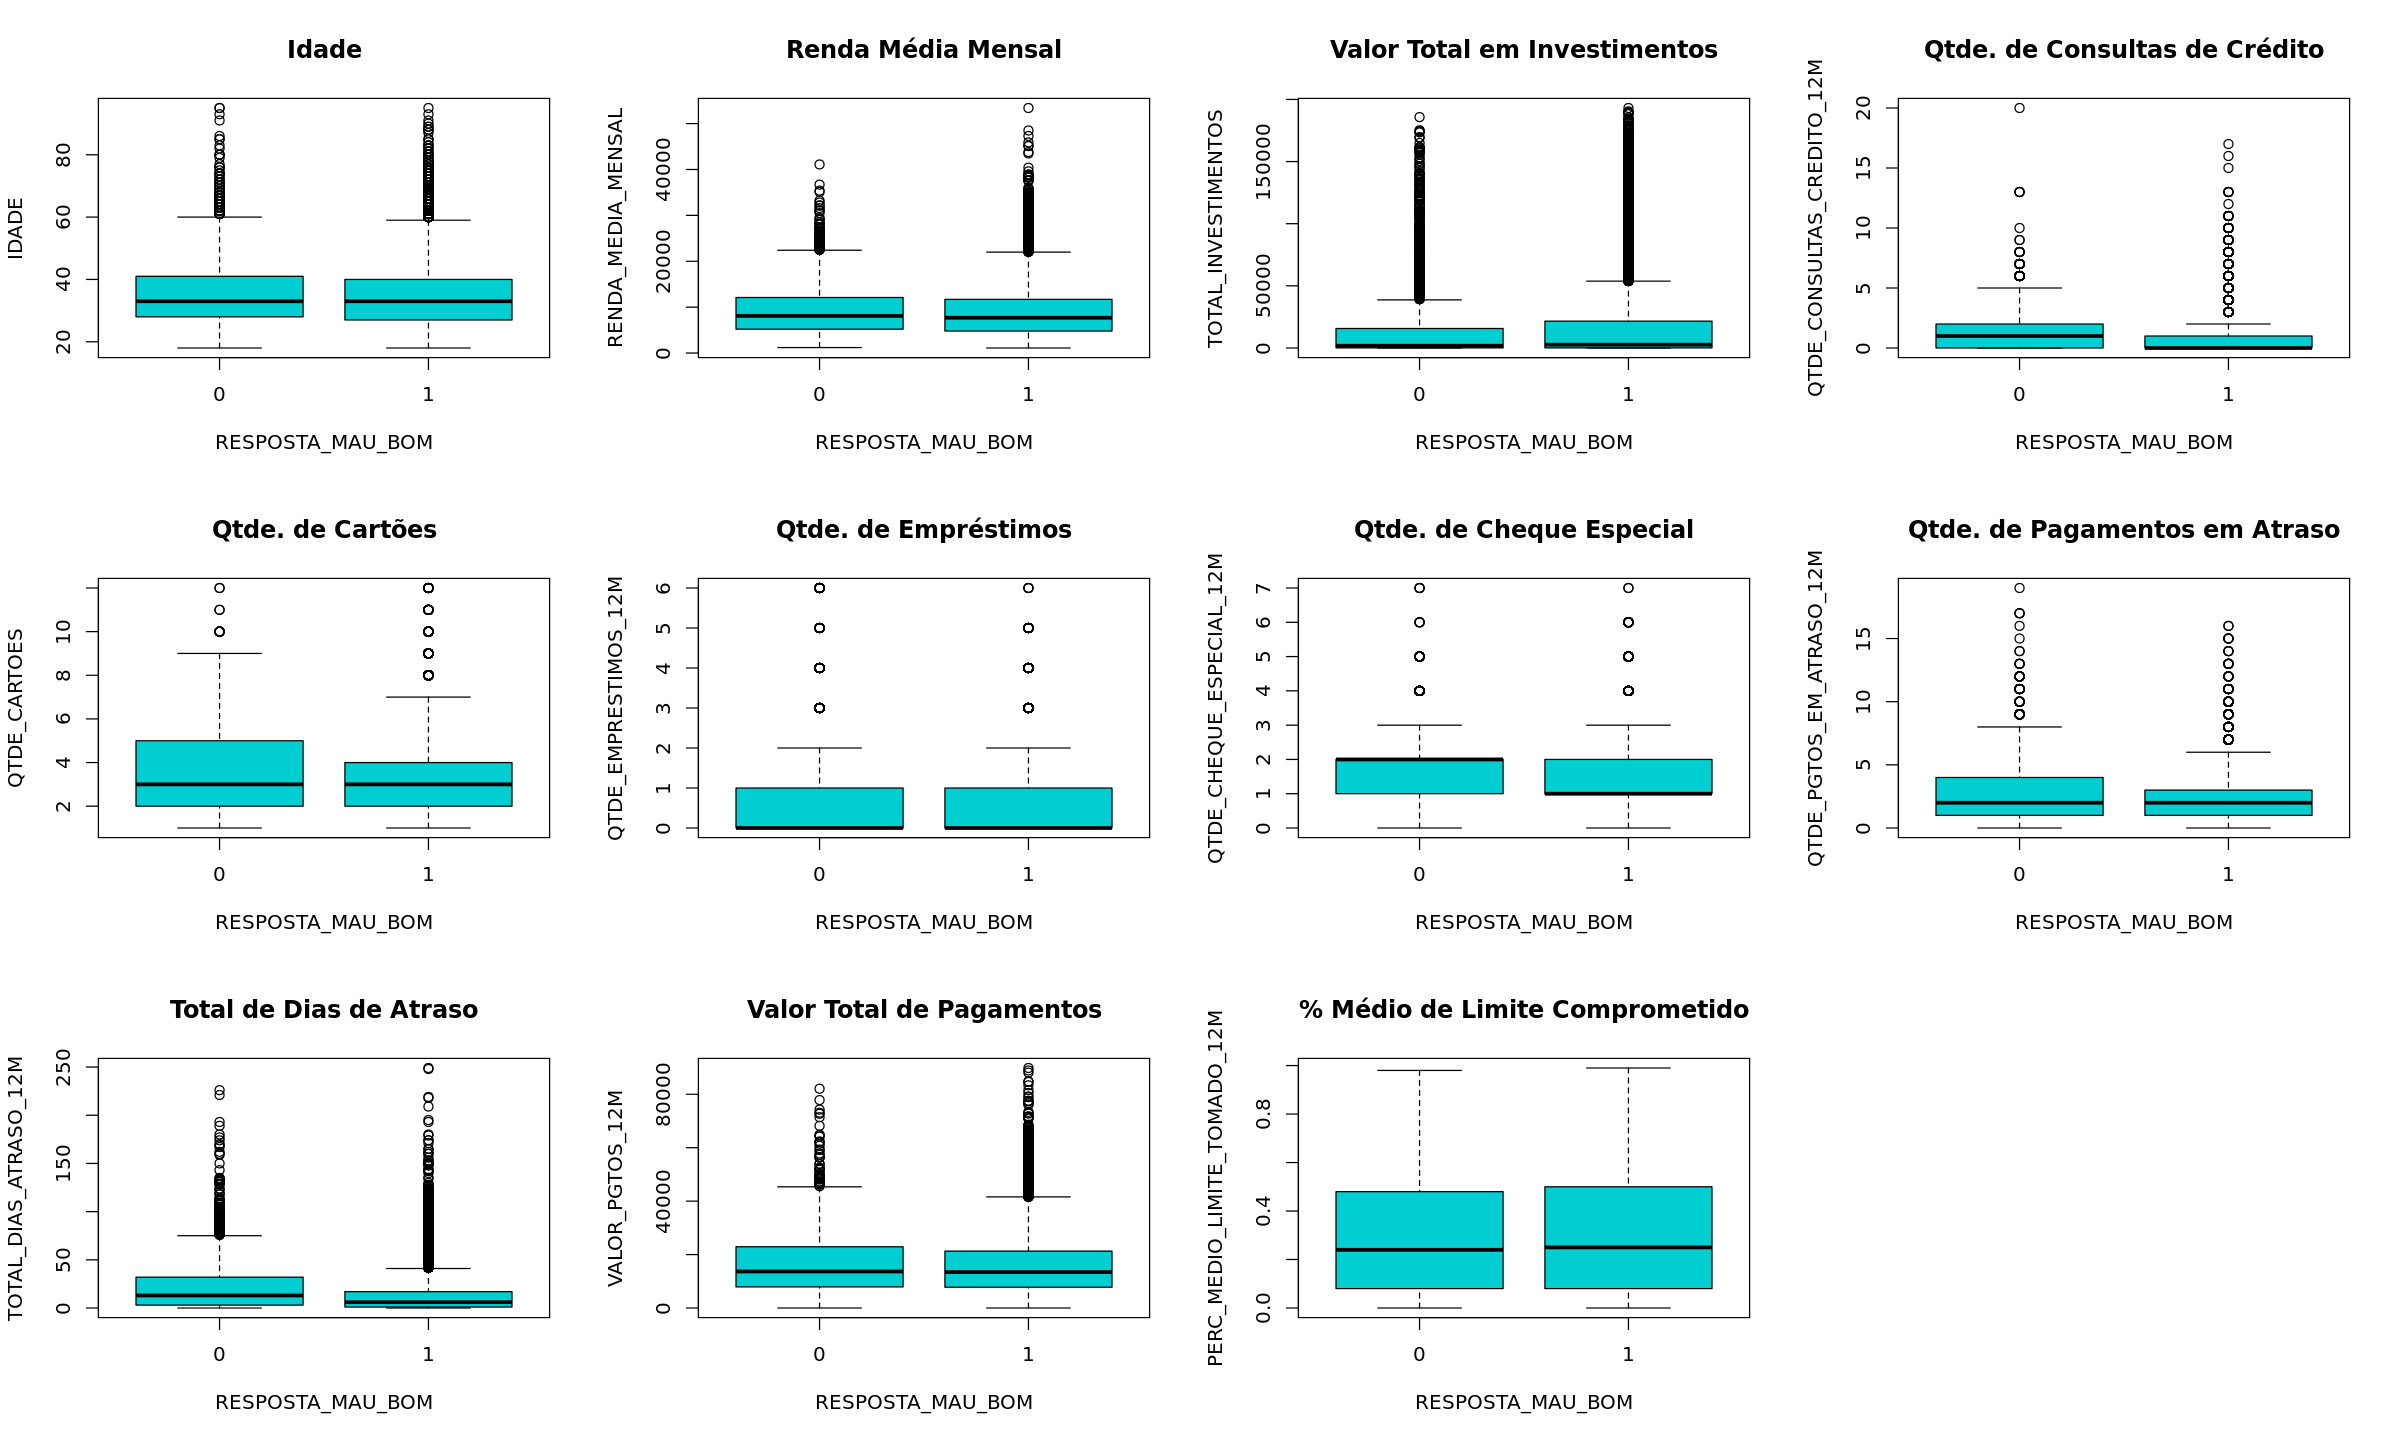

In [8]:
# Gráficos de boxplots
par(mfrow = c(3,4), cex = 1)
boxplot(IDADE                        ~ RESPOSTA_MAU_BOM, data = dados_credito, col = "darkturquoise", main = "Idade")
boxplot(RENDA_MEDIA_MENSAL           ~ RESPOSTA_MAU_BOM, data = dados_credito, col = "darkturquoise", main = "Renda Média Mensal")
boxplot(TOTAL_INVESTIMENTOS          ~ RESPOSTA_MAU_BOM, data = dados_credito, col = "darkturquoise", main = "Valor Total em Investimentos")
boxplot(QTDE_CONSULTAS_CREDITO_12M   ~ RESPOSTA_MAU_BOM, data = dados_credito, col = "darkturquoise", main = "Qtde. de Consultas de Crédito")
boxplot(QTDE_CARTOES                 ~ RESPOSTA_MAU_BOM, data = dados_credito, col = "darkturquoise", main = "Qtde. de Cartões")
boxplot(QTDE_EMPRESTIMOS_12M         ~ RESPOSTA_MAU_BOM, data = dados_credito, col = "darkturquoise", main = "Qtde. de Empréstimos")
boxplot(QTDE_CHEQUE_ESPECIAL_12M     ~ RESPOSTA_MAU_BOM, data = dados_credito, col = "darkturquoise", main = "Qtde. de Cheque Especial")
boxplot(QTDE_PGTOS_EM_ATRASO_12M     ~ RESPOSTA_MAU_BOM, data = dados_credito, col = "darkturquoise", main = "Qtde. de Pagamentos em Atraso")
boxplot(TOTAL_DIAS_ATRASO_12M        ~ RESPOSTA_MAU_BOM, data = dados_credito, col = "darkturquoise", main = "Total de Dias de Atraso")
boxplot(VALOR_PGTOS_12M              ~ RESPOSTA_MAU_BOM, data = dados_credito, col = "darkturquoise", main = "Valor Total de Pagamentos")
boxplot(PERC_MEDIO_LIMITE_TOMADO_12M ~ RESPOSTA_MAU_BOM, data = dados_credito, col = "darkturquoise", main = "% Médio de Limite Comprometido")

In [9]:
# Resetando parâmetros gráficos (recomendado apenas no Colab)
options(reset_options)

In [10]:
# Tabela de frequências: safra versus resposta (somando 100% nas linhas)
table(dados_credito$SAFRA, dados_credito$RESPOSTA_MAU_BOM)
prop.table(table(dados_credito$SAFRA, dados_credito$RESPOSTA_MAU_BOM), 1)

         
             0    1
  Safra 1  891 4549
  Safra 2 1132 5928
  Safra 3  942 4816

         
                  0         1
  Safra 1 0.1637868 0.8362132
  Safra 2 0.1603399 0.8396601
  Safra 3 0.1635985 0.8364015

In [11]:
# Tabela de frequências: flag de pagamento parcial versus resposta (somando 100% nas linhas)
table(dados_credito$FLAG_PGTO_PARCIAL_12M, dados_credito$RESPOSTA_MAU_BOM)
prop.table(table(dados_credito$FLAG_PGTO_PARCIAL_12M, dados_credito$RESPOSTA_MAU_BOM), 1)

     
         0    1
  Nao  643 5918
  Sim 2322 9375

     
               0          1
  Nao 0.09800335 0.90199665
  Sim 0.19851244 0.80148756

### Modelo de regressão logística múltipla

In [12]:
# Comando auxiliar para para omitir notação científica nos p-valores e controlar largura dos outputs na tela do Colab
options(scipen = 999, width = 200)

In [13]:
# Ajuste do modelo 1: inicial
regressao_1 <- glm(RESPOSTA_MAU_BOM ~
                     IDADE +
                     RENDA_MEDIA_MENSAL +
                     QTDE_CONSULTAS_CREDITO_12M +
                     QTDE_CARTOES +
                     QTDE_EMPRESTIMOS_12M +
                     QTDE_CHEQUE_ESPECIAL_12M +
                     QTDE_PGTOS_EM_ATRASO_12M +
                     TOTAL_DIAS_ATRASO_12M +
                     VALOR_PGTOS_12M +
                     PERC_MEDIO_LIMITE_TOMADO_12M,
                   family = binomial(link = 'logit'),
                   data = dados_credito)

summary(regressao_1)


Call:
glm(formula = RESPOSTA_MAU_BOM ~ IDADE + RENDA_MEDIA_MENSAL + 
    QTDE_CONSULTAS_CREDITO_12M + QTDE_CARTOES + QTDE_EMPRESTIMOS_12M + 
    QTDE_CHEQUE_ESPECIAL_12M + QTDE_PGTOS_EM_ATRASO_12M + TOTAL_DIAS_ATRASO_12M + 
    VALOR_PGTOS_12M + PERC_MEDIO_LIMITE_TOMADO_12M, family = binomial(link = "logit"), 
    data = dados_credito)

Coefficients:
                                 Estimate   Std. Error z value             Pr(>|z|)    
(Intercept)                   2.424268279  0.098046594  24.726 < 0.0000000000000002 ***
IDADE                        -0.003327409  0.001956881  -1.700               0.0891 .  
RENDA_MEDIA_MENSAL            0.000002288  0.000003788   0.604               0.5459    
QTDE_CONSULTAS_CREDITO_12M    0.011854774  0.016128588   0.735               0.4623    
QTDE_CARTOES                 -0.023000176  0.014411142  -1.596               0.1105    
QTDE_EMPRESTIMOS_12M         -0.318166527  0.030300785 -10.500 < 0.0000000000000002 ***
QTDE_CHEQUE_ESPECIAL_12M     -

In [14]:
# Ajuste do modelo 2: retirando PERC_MEDIO_LIMITE_TOMADO_12M
regressao_2 <- glm(RESPOSTA_MAU_BOM ~
                     IDADE +
                     RENDA_MEDIA_MENSAL +
                     QTDE_CONSULTAS_CREDITO_12M +
                     QTDE_CARTOES +
                     QTDE_EMPRESTIMOS_12M +
                     QTDE_CHEQUE_ESPECIAL_12M +
                     QTDE_PGTOS_EM_ATRASO_12M +
                     TOTAL_DIAS_ATRASO_12M +
                     VALOR_PGTOS_12M,
                   family = binomial(link = 'logit'),
                   data = dados_credito)

summary(regressao_2)


Call:
glm(formula = RESPOSTA_MAU_BOM ~ IDADE + RENDA_MEDIA_MENSAL + 
    QTDE_CONSULTAS_CREDITO_12M + QTDE_CARTOES + QTDE_EMPRESTIMOS_12M + 
    QTDE_CHEQUE_ESPECIAL_12M + QTDE_PGTOS_EM_ATRASO_12M + TOTAL_DIAS_ATRASO_12M + 
    VALOR_PGTOS_12M, family = binomial(link = "logit"), data = dados_credito)

Coefficients:
                               Estimate   Std. Error z value             Pr(>|z|)    
(Intercept)                 2.437233771  0.093263692  26.133 < 0.0000000000000002 ***
IDADE                      -0.003334701  0.001956775  -1.704               0.0883 .  
RENDA_MEDIA_MENSAL          0.000002316  0.000003788   0.611               0.5409    
QTDE_CONSULTAS_CREDITO_12M  0.011578990  0.016118006   0.718               0.4725    
QTDE_CARTOES               -0.022953869  0.014410997  -1.593               0.1112    
QTDE_EMPRESTIMOS_12M       -0.318127040  0.030301148 -10.499 < 0.0000000000000002 ***
QTDE_CHEQUE_ESPECIAL_12M   -0.209759943  0.025899370  -8.099 0.00000000000000055

In [15]:
# Ajuste do modelo 3: retirando RENDA_MEDIA_MENSAL
regressao_3 <- glm(RESPOSTA_MAU_BOM ~
                     IDADE +
                     QTDE_CONSULTAS_CREDITO_12M +
                     QTDE_CARTOES +
                     QTDE_EMPRESTIMOS_12M +
                     QTDE_CHEQUE_ESPECIAL_12M +
                     QTDE_PGTOS_EM_ATRASO_12M +
                     TOTAL_DIAS_ATRASO_12M +
                     VALOR_PGTOS_12M,
                   family = binomial(link = 'logit'),
                   data = dados_credito)

summary(regressao_3)


Call:
glm(formula = RESPOSTA_MAU_BOM ~ IDADE + QTDE_CONSULTAS_CREDITO_12M + 
    QTDE_CARTOES + QTDE_EMPRESTIMOS_12M + QTDE_CHEQUE_ESPECIAL_12M + 
    QTDE_PGTOS_EM_ATRASO_12M + TOTAL_DIAS_ATRASO_12M + VALOR_PGTOS_12M, 
    family = binomial(link = "logit"), data = dados_credito)

Coefficients:
                               Estimate   Std. Error z value             Pr(>|z|)    
(Intercept)                 2.453804276  0.089274614  27.486 < 0.0000000000000002 ***
IDADE                      -0.003345913  0.001956741  -1.710               0.0873 .  
QTDE_CONSULTAS_CREDITO_12M  0.013040898  0.015928575   0.819               0.4130    
QTDE_CARTOES               -0.021995764  0.014327351  -1.535               0.1247    
QTDE_EMPRESTIMOS_12M       -0.317781453  0.030299497 -10.488 < 0.0000000000000002 ***
QTDE_CHEQUE_ESPECIAL_12M   -0.210179387  0.025889236  -8.118 0.000000000000000472 ***
QTDE_PGTOS_EM_ATRASO_12M   -0.115656346  0.011999759  -9.638 < 0.0000000000000002 ***
TOTAL_DIAS_ATRA

In [16]:
# Ajuste do modelo 4: retirando QTDE_CONSULTAS_CREDITO_12M
regressao_4 <- glm(RESPOSTA_MAU_BOM ~
                     IDADE +
                     QTDE_CARTOES +
                     QTDE_EMPRESTIMOS_12M +
                     QTDE_CHEQUE_ESPECIAL_12M +
                     QTDE_PGTOS_EM_ATRASO_12M +
                     TOTAL_DIAS_ATRASO_12M +
                     VALOR_PGTOS_12M,
                   family = binomial(link = 'logit'),
                   data = dados_credito)

summary(regressao_4)


Call:
glm(formula = RESPOSTA_MAU_BOM ~ IDADE + QTDE_CARTOES + QTDE_EMPRESTIMOS_12M + 
    QTDE_CHEQUE_ESPECIAL_12M + QTDE_PGTOS_EM_ATRASO_12M + TOTAL_DIAS_ATRASO_12M + 
    VALOR_PGTOS_12M, family = binomial(link = "logit"), data = dados_credito)

Coefficients:
                             Estimate   Std. Error z value             Pr(>|z|)    
(Intercept)               2.448878277  0.089043619  27.502 < 0.0000000000000002 ***
IDADE                    -0.003352957  0.001956627  -1.714               0.0866 .  
QTDE_CARTOES             -0.021433346  0.014313968  -1.497               0.1343    
QTDE_EMPRESTIMOS_12M     -0.317238979  0.030295714 -10.471 < 0.0000000000000002 ***
QTDE_CHEQUE_ESPECIAL_12M -0.200149782  0.022831617  -8.766 < 0.0000000000000002 ***
QTDE_PGTOS_EM_ATRASO_12M -0.115802885  0.011998769  -9.651 < 0.0000000000000002 ***
TOTAL_DIAS_ATRASO_12M    -0.001915757  0.001194790  -1.603               0.1088    
VALOR_PGTOS_12M           0.000010987  0.000001879   5.848       

In [17]:
# Ajuste do modelo 5: retirando QTDE_CARTOES
regressao_5 <- glm(RESPOSTA_MAU_BOM ~
                     IDADE +
                     QTDE_EMPRESTIMOS_12M +
                     QTDE_CHEQUE_ESPECIAL_12M +
                     QTDE_PGTOS_EM_ATRASO_12M +
                     TOTAL_DIAS_ATRASO_12M +
                     VALOR_PGTOS_12M,
                   family = binomial(link = 'logit'),
                   data = dados_credito)

summary(regressao_5)


Call:
glm(formula = RESPOSTA_MAU_BOM ~ IDADE + QTDE_EMPRESTIMOS_12M + 
    QTDE_CHEQUE_ESPECIAL_12M + QTDE_PGTOS_EM_ATRASO_12M + TOTAL_DIAS_ATRASO_12M + 
    VALOR_PGTOS_12M, family = binomial(link = "logit"), data = dados_credito)

Coefficients:
                             Estimate   Std. Error z value             Pr(>|z|)    
(Intercept)               2.408956038  0.084851349  28.390 < 0.0000000000000002 ***
IDADE                    -0.003329586  0.001956517  -1.702               0.0888 .  
QTDE_EMPRESTIMOS_12M     -0.329777448  0.029153871 -11.312 < 0.0000000000000002 ***
QTDE_CHEQUE_ESPECIAL_12M -0.204385260  0.022643875  -9.026 < 0.0000000000000002 ***
QTDE_PGTOS_EM_ATRASO_12M -0.118498893  0.011863481  -9.989 < 0.0000000000000002 ***
TOTAL_DIAS_ATRASO_12M    -0.002174290  0.001182239  -1.839               0.0659 .  
VALOR_PGTOS_12M           0.000010653  0.000001866   5.708         0.0000000114 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion 

In [18]:
# Ajuste do modelo 6: retirando IDADE
regressao_6 <- glm(RESPOSTA_MAU_BOM ~
                     QTDE_EMPRESTIMOS_12M +
                     QTDE_CHEQUE_ESPECIAL_12M +
                     QTDE_PGTOS_EM_ATRASO_12M +
                     TOTAL_DIAS_ATRASO_12M +
                     VALOR_PGTOS_12M,
                   family = binomial(link = 'logit'),
                   data = dados_credito)

summary(regressao_6)


Call:
glm(formula = RESPOSTA_MAU_BOM ~ QTDE_EMPRESTIMOS_12M + QTDE_CHEQUE_ESPECIAL_12M + 
    QTDE_PGTOS_EM_ATRASO_12M + TOTAL_DIAS_ATRASO_12M + VALOR_PGTOS_12M, 
    family = binomial(link = "logit"), data = dados_credito)

Coefficients:
                             Estimate   Std. Error z value             Pr(>|z|)    
(Intercept)               2.292032559  0.049381213  46.415 < 0.0000000000000002 ***
QTDE_EMPRESTIMOS_12M     -0.330529030  0.029145170 -11.341 < 0.0000000000000002 ***
QTDE_CHEQUE_ESPECIAL_12M -0.204433867  0.022641491  -9.029 < 0.0000000000000002 ***
QTDE_PGTOS_EM_ATRASO_12M -0.118667481  0.011861492 -10.004 < 0.0000000000000002 ***
TOTAL_DIAS_ATRASO_12M    -0.002145749  0.001181810  -1.816               0.0694 .  
VALOR_PGTOS_12M           0.000010675  0.000001866   5.720         0.0000000107 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16199  on 18257  degrees of

In [19]:
# Ajuste do modelo 7: retirando TOTAL_DIAS_ATRASO_12M
regressao_7 <- glm(RESPOSTA_MAU_BOM ~
                     QTDE_EMPRESTIMOS_12M +
                     QTDE_CHEQUE_ESPECIAL_12M +
                     QTDE_PGTOS_EM_ATRASO_12M +
                     VALOR_PGTOS_12M,
                   family = binomial(link = 'logit'),
                   data = dados_credito)

summary(regressao_7)


Call:
glm(formula = RESPOSTA_MAU_BOM ~ QTDE_EMPRESTIMOS_12M + QTDE_CHEQUE_ESPECIAL_12M + 
    QTDE_PGTOS_EM_ATRASO_12M + VALOR_PGTOS_12M, family = binomial(link = "logit"), 
    data = dados_credito)

Coefficients:
                             Estimate   Std. Error z value             Pr(>|z|)    
(Intercept)               2.299904893  0.049193757  46.752 < 0.0000000000000002 ***
QTDE_EMPRESTIMOS_12M     -0.358091270  0.024723817 -14.484 < 0.0000000000000002 ***
QTDE_CHEQUE_ESPECIAL_12M -0.207935451  0.022531727  -9.229 < 0.0000000000000002 ***
QTDE_PGTOS_EM_ATRASO_12M -0.127906058  0.010700159 -11.954 < 0.0000000000000002 ***
VALOR_PGTOS_12M           0.000010505  0.000001866   5.629         0.0000000182 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16199  on 18257  degrees of freedom
Residual deviance: 15488  on 18253  degrees of freedom
AIC: 15498

Number of Fisher Scoring iterati

In [20]:
# Avaliação de colinearidade no modelo 7
data.frame(VIF = vif(regressao_7))

,VIF
,<dbl>
QTDE_EMPRESTIMOS_12M,1.212966
QTDE_CHEQUE_ESPECIAL_12M,1.108294
QTDE_PGTOS_EM_ATRASO_12M,1.169676
VALOR_PGTOS_12M,1.108867


### Intervalos de confiança

In [21]:
# Escolha do beta (0 para intercepto, ou 1, 2, ... para os parâmetros referentes a cada variável explicativa)
beta = 0

In [22]:
# Cálculo do intervalo
print("Limite inferior")
as.numeric(regressao_7$coefficients[beta + 1] - 1.96 * coef(summary(regressao_7))[beta + 1, "Std. Error"])
print("Limite superior")
as.numeric(regressao_7$coefficients[beta + 1] + 1.96 * coef(summary(regressao_7))[beta + 1, "Std. Error"])

[1] "Limite inferior"


[1] 2.203485

[1] "Limite superior"


[1] 2.396325

### Aplicação do modelo e definição de resposta predita

In [ ]:
# Aplicação do modelo na base (criação de uma nova coluna chamada "probabilidade")
dados_credito$probabilidade <- predict(regressao_7,
                                       dados_credito,
                                       type = "response")

In [ ]:
# Definição de ponto de corte (padrão: % de 1's na amostra)
ponto_corte <- mean(dados_credito$RESPOSTA_MAU_BOM)
ponto_corte

In [ ]:
# Definição da resposta predita pelo modelo (criação de uma nova coluna chamada "predito")
dados_credito$predito <- as.factor(ifelse(dados_credito$probabilidade > ponto_corte, 1, 0))

### Análise de desempenho

In [ ]:
# Tabela de classificação
tabela <- table(dados_credito$RESPOSTA_MAU_BOM, dados_credito$predito)

In [ ]:
# Acurácia
(tabela[1,1] + tabela[2,2]) / sum(tabela)

In [ ]:
# Especificidade
tabela[1,1] / (tabela[1,1] + tabela[1,2])

In [ ]:
# Sensibilidade
tabela[2,2] / (tabela[2,1] + tabela[2,2])

In [ ]:
# KS
pred <- prediction(dados_credito$probabilidade, dados_credito$RESPOSTA_MAU_BOM)
perf <- performance(pred, "tpr", "fpr")
ks <- max(attr(perf, 'y.values')[[1]] - attr(perf, 'x.values')[[1]])

print(ks)

In [ ]:
# AUC
pred <- prediction(dados_credito$probabilidade, dados_credito$RESPOSTA_MAU_BOM)
auc <- performance(pred, "auc")
auc <- auc@y.values[[1]]

print(auc)

### Exemplo de uso (aplicação) do modelo

In [ ]:
# Criação de base de dados com um novo cliente, que possui plano pré-pago, renda mensal de 5.000 reais e 30 anos de idade.
# Obs.: os nomes das colunas e padrão de conteúdo devem ser idênticos aos da base utilizada para construção do modelo
novos_dados <- data.frame(QTDE_EMPRESTIMOS_12M     = c(1),
                          QTDE_CHEQUE_ESPECIAL_12M = c(0),
                          QTDE_PGTOS_EM_ATRASO_12M = c(0),
                          VALOR_PGTOS_12M          = c(10000))

In [ ]:
# Aplicação do modelo
novos_dados$PROB_CANCELAR_6M <- predict(regressao_7, novos_dados, type = "response")
View(novos_dados)